<a href="https://colab.research.google.com/github/eneykng/file-for-data-110/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
titanic_df = sns.load_dataset('titanic')
print(titanic_df.head())
print(titanic_df.tail())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
     survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  19.0      0      0  30.00        S

## Calculate EDA
* explore age distribution of a dataset

In [2]:
titanic_male = titanic_df[titanic_df['sex']=='male']['age']
titanic_female = titanic_df[titanic_df['sex']=='female']['age']
print ('summary statistics for female passangers:\n')
print(titanic_female.describe())
print('summary statiscitcs for male passangers: \n')
print(titanic_male.describe())



summary statistics for female passangers:

count    261.000000
mean      27.915709
std       14.110146
min        0.750000
25%       18.000000
50%       27.000000
75%       37.000000
max       63.000000
Name: age, dtype: float64
summary statiscitcs for male passangers: 

count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: age, dtype: float64


* calculate and compare the overall survival rate of the survival rate by gender

In [3]:
# Survival rate
survival_rate = sum(titanic_df['survived'].astype(int))
print(f"the overall survival rate is {survival_rate}")
#survival rate of female
survived_female = sum(titanic_df[titanic_df['sex']=='female']['survived'].astype(int))
percent_fem = round(survived_female / survival_rate*100 , 2)
print(f"the survival rate for female is {survived_female}, which is {percent_fem}% of all passangers survived")
survived_male = sum(titanic_df[titanic_df['sex']=='male']['survived'].astype(int))
percent_male = round(survived_male/survival_rate*100 , 2)
print(f"the survival rate for male is {survived_male}, which is {percent_male}% of all passangers survived")


the overall survival rate is 342
the survival rate for female is 233, which is 68.13% of all passangers survived
the survival rate for male is 109, which is 31.87% of all passangers survived


In [66]:
ship_male = len(titanic_df[titanic_df['sex'] == 'male'])
print(ship_male)
ship_female = len(titanic_df[titanic_df['sex'] == 'female'])
print(ship_female)


577
314


* Analyse the survival rates by passenger class

In [4]:

surv_first_class = sum(titanic_df[titanic_df['class']=='First']['survived'])
surv_1_to_1 = sum(titanic_df['class']=='First')
perc_surv_1 = round(surv_first_class/survival_rate*100,2)
perc_surv_1_to_1 = round(surv_first_class/surv_1_to_1, 2)
surv_second_class = sum(titanic_df[titanic_df['class']=='Second']['survived'])
surv_2_to_2 = sum(titanic_df['class']=='Second')
perc_surv_2_to_2 = round(surv_second_class/surv_2_to_2, 2)
perc_surv_2 = round(surv_second_class/survival_rate*100 , 2)
surv_third_class = sum(titanic_df[titanic_df['class']=='Third']['survived'])
perc_surv_3 = round(surv_third_class/survival_rate*100 , 2)
surv_3_to_3 = sum(titanic_df['class']=='Third')
perc_surv_3_to_3 = round(surv_second_class/surv_3_to_3, 2)
print(f" Number of passangers that survived in first class is {surv_first_class}, or {perc_surv_1}% of all passangers survived, or {perc_surv_1_to_1}% of passangers of the first class \n")
print(f" Number of passangers that survived in second class is {surv_second_class}, or {perc_surv_2}% of all passangers survived, or {perc_surv_2_to_2}% of passangers of the second class \n")
print(f" Number of passangers that survived in third class is {surv_third_class}, or {perc_surv_3}% of all passangers survived, or {perc_surv_3_to_3}% of passangers of the third class \n")

 Number of passangers that survived in first class is 136, or 39.77% of all passangers survived, or 0.63% of passangers of the first class 

 Number of passangers that survived in second class is 87, or 25.44% of all passangers survived, or 0.47% of passangers of the second class 

 Number of passangers that survived in third class is 119, or 34.8% of all passangers survived, or 0.18% of passangers of the third class 



## Visualizing age distribution by survival status
* Histogram of age distribution for survivors and non-survivors


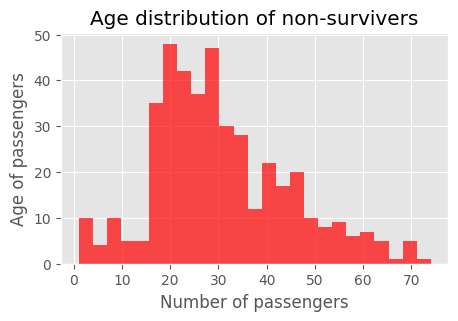

In [57]:

plt.figure(figsize=(5,3))
plt.hist(non_surv_age, bins = 25, label='Survived', alpha = 0.7, color = 'red')
plt.ylabel('Age of passengers')
plt.xlabel('Number of passengers')
plt.title("Age distribution of non-survivers")
plt.show()

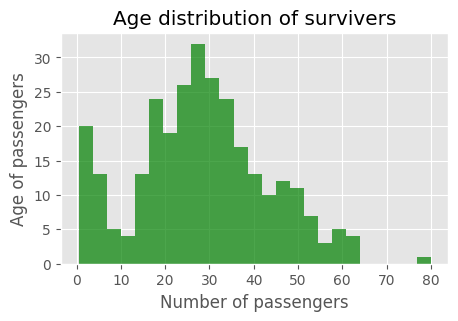

In [58]:
plt.figure(figsize=(5,3))
plt.hist(surv_age, bins = 25, label='Survived', alpha = 0.7, color = 'green')
plt.ylabel('Age of passengers')
plt.xlabel('Number of passengers')
plt.title("Age distribution of survivers")
plt.show()

* Pyramid-style plot to compare age distributions between survivors and non-survivors

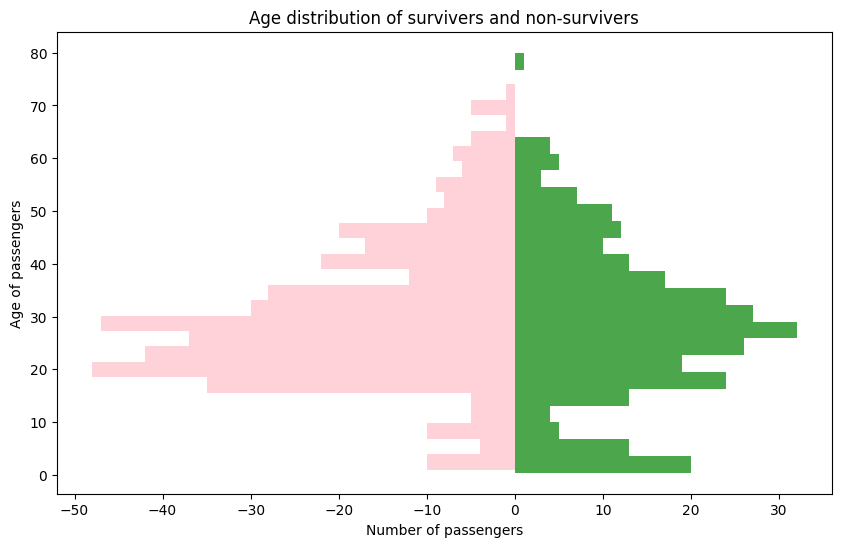

In [8]:
surv_age = titanic_df['age'][titanic_df['survived']== 1]
non_surv_age = titanic_df['age'][titanic_df['survived']== 0]
plt.figure(figsize=(10,6))
plt.hist(surv_age, bins = 25, label='Survived', alpha = 0.7, color = 'green', orientation = 'horizontal')
plt.hist(non_surv_age, bins = 25, label = "Not suvived", alpha = 0.7, color = 'pink', weights = np.ones_like(non_surv_age)*[-1], orientation = 'horizontal')
plt.ylabel('Age of passengers')
plt.xlabel('Number of passengers')
plt.title("Age distribution of survivers and non-survivers")
plt.show()


* KDE Plot for Survival by Age

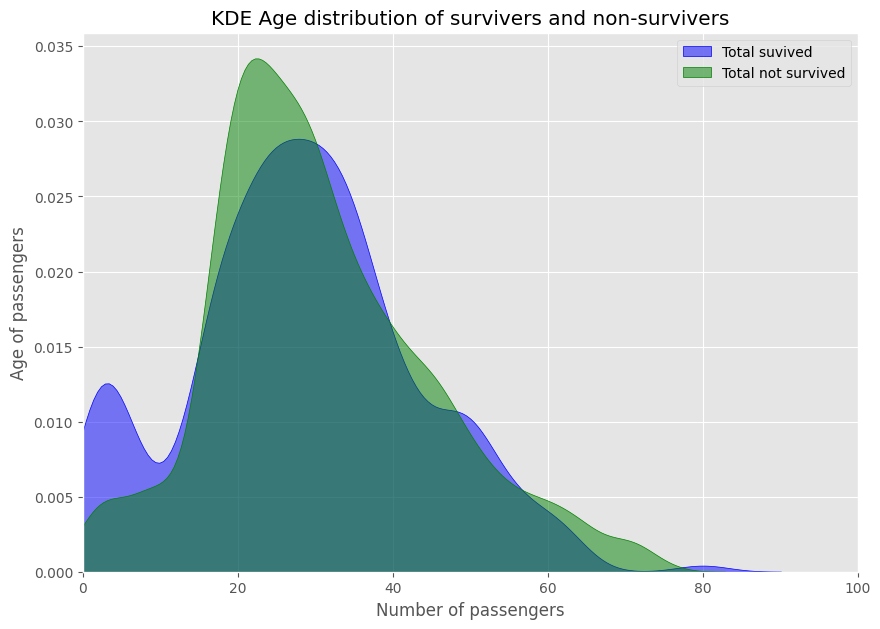

In [60]:
plt.figure(figsize = (10,7))
sns.kdeplot(surv_age, bw_adjust=0.7, fill = True, color = 'blue', alpha = 0.5, label = 'Total suvived')
sns.kdeplot(non_surv_age, bw_adjust=0.7, fill = True, color = 'green', alpha = 0.5, label = "Total not survived")
plt.ylabel('Age of passengers')
plt.xlabel('Number of passengers')
plt.title("KDE Age distribution of survivers and non-survivers")
plt.legend()
plt.xlim(0, 100)
plt.show()

## Bar Graphs for Passenger Class
* Bar Graph of Passenger Class

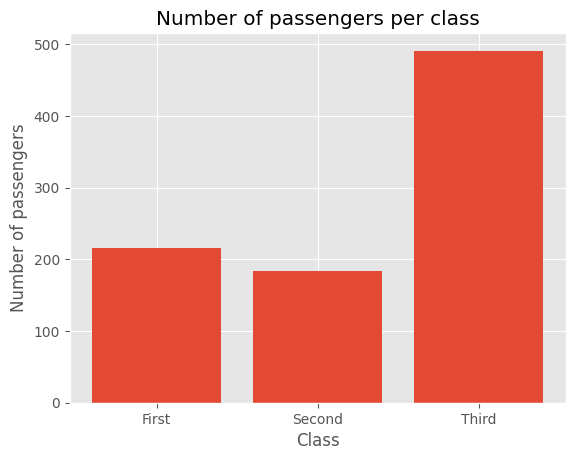

In [47]:
first_class = len(titanic_df[titanic_df['class']=='First'])
first_class
second_class = len(titanic_df[titanic_df['class']=='Second'])
second_class
third_class = len(titanic_df[titanic_df['class']=='Third'])
third_class
classes = first_class, second_class, third_class
class_set = 'First', 'Second', 'Third'

plt.bar(class_set, classes)
plt.title('Number of passengers per class')
plt.xlabel("Class")
plt.ylabel('Number of passengers')
plt.show()


* Bar graph of death by class

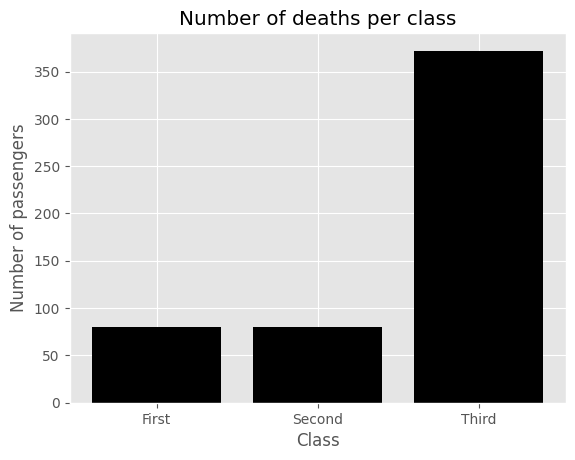

In [52]:
death_1 = surv_1_to_1-surv_first_class
death_2 = surv_2_to_2-surv_second_class
death_3 = surv_3_to_3-surv_third_class
death = death_1, death_1, death_3
plt.bar(class_set, death, color = 'black')
plt.title('Number of deaths per class')
plt.xlabel("Class")
plt.ylabel('Number of passengers')
plt.show()

## Conslusion
* The most valnurable group was the third class passengers (the highest number of passengers and the least number of survivers)
* There were more survivers between children then between older people.
* People at the age around 20 years old is the main surviving population, so that is expected they could take their chilren with them.
* There were twice as many women between survivers as men, however the number of men on the ship was bigger (577 to 314)
*A group that survived the most are women in their 20th from first class